 We have house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following: Detect the outliers and remove it using:
1.
Mean Functio2.n
Percentile meth3.od
IQR(Inter quartile range meth4.od)
Normal distribu5.tion
Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column)) Check the correlation between all the numerical columns and plot heatmap. Scatter plot between the variables to check the correlation betweenaborn as sns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [4]:
df.dtypes

location           object
size               object
total_sqft        float64
bath                int64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB


No Null values found

In [7]:
df.shape

(13200, 7)

In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


**Mean fuction**

In [8]:
mean=df.price_per_sqft.mean()
print("Mean: ",mean)

Mean:  7920.336742424242


In [10]:
median=df.price_per_sqft.median()
print("Median: ",median)

Median:  5438.0


Mean and median of price_per_sqft have significant difference.So data must have outliers

**Percentile method**

In [42]:
df.price_per_sqft.quantile([0.0005,0.0010,0.0050,0.1,0.25,0.30,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.76,0.78,0.80,0.82,0.85,0.90,0.92,0.95,0.96,0.97,0.98])

0.0005      816.527
0.0010     1366.184
0.0050     2398.905
0.1000     3500.000
0.2500     4267.000
0.3000     4499.000
0.4000     4953.600
0.4500     5176.000
0.5000     5438.000
0.5500     5685.000
0.6000     6000.000
0.6500     6363.000
0.7000     6776.300
0.7500     7317.000
0.7600     7440.000
0.7800     7718.440
0.8000     8019.200
0.8200     8428.000
0.8500     9333.900
0.9000    11666.000
0.9200    12857.000
0.9500    15312.100
0.9600    16500.000
0.9700    17857.000
0.9800    20000.000
Name: price_per_sqft, dtype: float64

In [43]:
df_percentile=df[(df.price_per_sqft <= df.price_per_sqft.quantile(0.85)) & (df.price_per_sqft >= df.price_per_sqft.quantile(0.0050))]      #without outlier                                                               
df_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


<Axes: ylabel='price_per_sqft'>

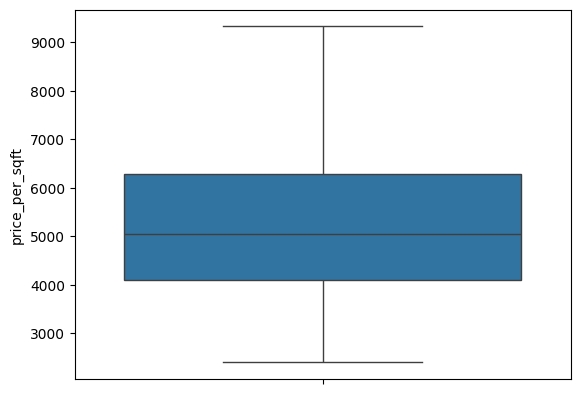

In [44]:
sns.boxplot(df_percentile["price_per_sqft"])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

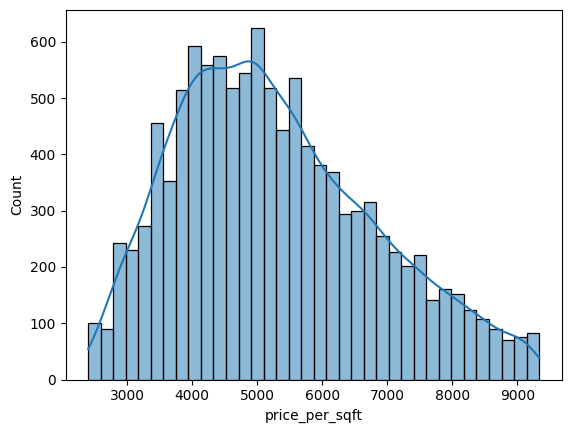

In [86]:
sns.histplot(df_percentile["price_per_sqft"], kde=True)


**IQR(Inter quartile range method)**

In [48]:
Q1=df.price_per_sqft.quantile(0.25)
print("Q1: ",Q1)
Q3=df.price_per_sqft.quantile(0.75)
print("Q3: ",Q3)
IQR=Q3-Q1
print("IQR:" ,IQR)

Q1:  4267.0
Q3:  7317.0
IQR: 3050.0


In [51]:
#lower whisker
LW=Q1-1.5*IQR
LW

-308.0

In [52]:
#upper whisker
UW=Q3+1.5*IQR
UW

11892.0

In [53]:
df_IQR=df[(df.price_per_sqft<UW) & (df.price_per_sqft>LW)]
df_IQR

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

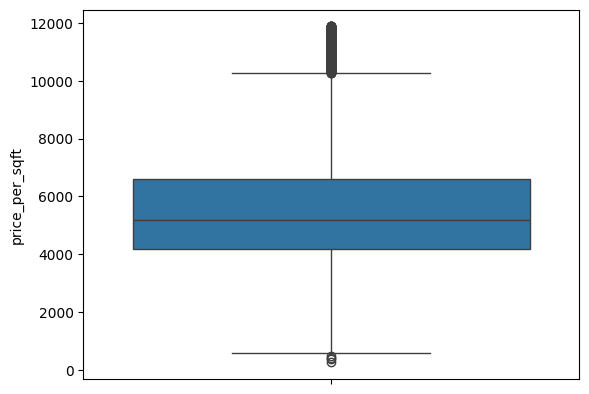

In [54]:
sns.boxplot(df_IQR["price_per_sqft"])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

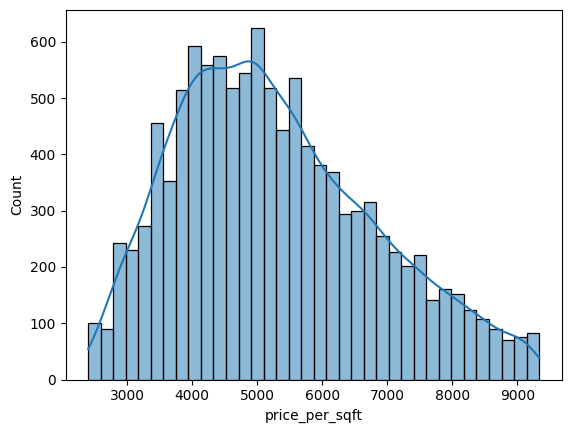

In [85]:
sns.histplot(df_percentile["price_per_sqft"], kde=True)

**Normal distribution**

In [58]:
#sigma
sigma=df.price_per_sqft.std()
sigma

106727.16032810867

In [59]:
#Mean
mean=df.price_per_sqft.mean()
mean

7920.336742424242

In [61]:
#lower limit
LL=mean-3*sigma
LL

-312261.14424190175

In [62]:
#upper limit
UL=mean+3*sigma
UL

328101.8177267502

In [65]:
df_normaldis=df[(df.price_per_sqft<UL) & (df.price_per_sqft>LL)]
df_normaldis

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

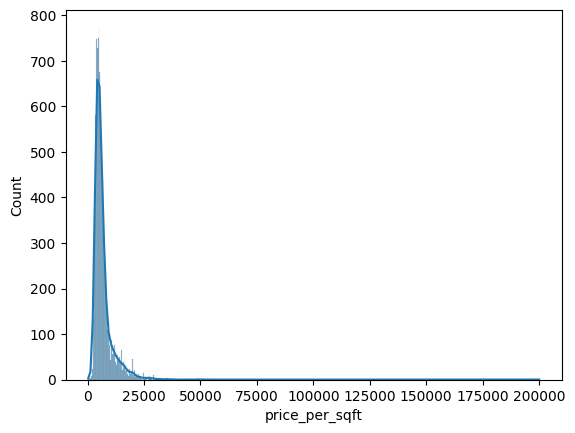

In [84]:
sns.histplot(df_normaldis["price_per_sqft"] , kde=True)

<Axes: ylabel='price_per_sqft'>

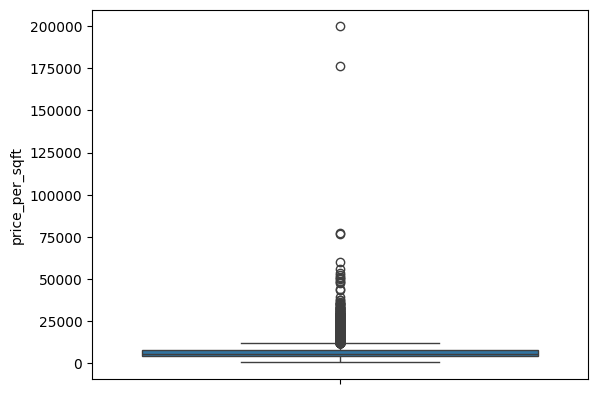

In [67]:
sns.boxplot(df_normaldis["price_per_sqft"])

**Zscore method**

In [79]:
df_Zscore=df.copy()
df_Zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.023299


In [80]:
df_Zscore["Z Score"]=(df.price_per_sqft - mean) / sigma
df_Zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore,Z Score
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039553,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.030970,-0.030970
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.033875,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.015697,-0.015697
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034390,-0.034390
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.011537,-0.011537
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.029896,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.024945,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.023299,0.023299


In [81]:
df_Zscore=df_Zscore[(df_Zscore["Z Score"] <= 3) & (df_Zscore["Z Score"] >= -3)] 
df_Zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore,Z Score
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039553,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.030970,-0.030970
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.033875,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.015697,-0.015697
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034390,-0.034390
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.011537,-0.011537
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.029896,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.024945,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.023299,0.023299


<Axes: xlabel='price_per_sqft', ylabel='Count'>

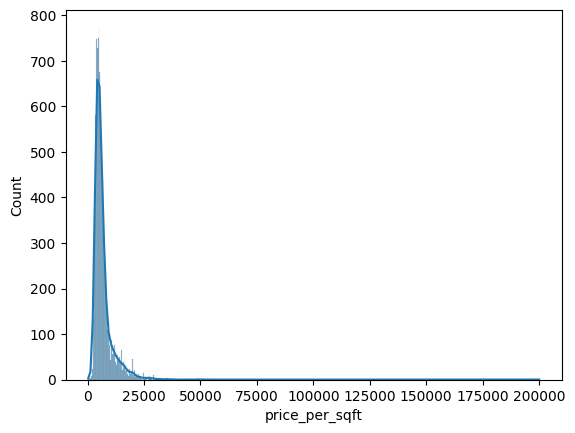

In [87]:
sns.histplot(df_Zscore["price_per_sqft"],kde=True)

<Axes: ylabel='price_per_sqft'>

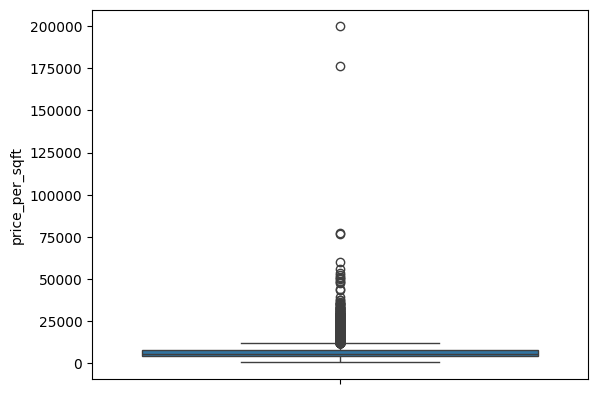

In [83]:
sns.boxplot(df_Zscore["price_per_sqft"])

**Correlation Matrix**

In [94]:
df1=df.drop(["location","size","Zscore"],axis=1)
df1

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2,39.07,2,3699
1,2600.0,5,120.00,4,4615
2,1440.0,2,62.00,3,4305
3,1521.0,3,95.00,3,6245
4,1200.0,2,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4,231.00,5,6689
13196,3600.0,5,400.00,4,11111
13197,1141.0,2,60.00,2,5258
13198,4689.0,4,488.00,4,10407


In [95]:
correlation=df1.corr()
correlation

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

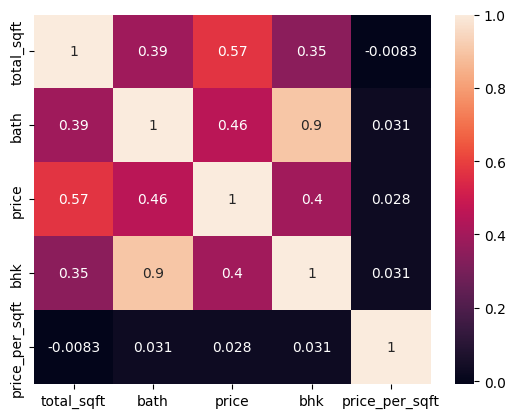

In [97]:
#heat map
sns.heatmap(correlation, annot = True)

**Scatter plot**

In [ ]:
sns.pairplot(df1)
plt.show()

**Box plot for all numerical columns**

In [ ]:
sns.boxplot(df.select_dtypes(include=[np.number])))
plt.show